<a href="https://colab.research.google.com/github/Indhusaikar/My-QC/blob/main/Qubit_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Qubit Phase

In [2]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 20.3 MB/s eta 0:00:00


In [3]:
# Listing 11.1: Convenience function to plot a Bloch Sphere using sphericalcoordinates
from math import pi, sin, cos
import matplotlib.pyplot as plt
import matplotlib
from qutip import Bloch

def plot_bloch_vector_spherical(theta, phi):
    b = Bloch()
    b.clear()
    vec = [sin(theta)*cos(phi),sin(theta)*sin(phi),cos(theta)]
    b.add_vectors(vec)
    return b.show()
#CAPTION Convenience function to plot a Bloch Sphere using spherical coordinates

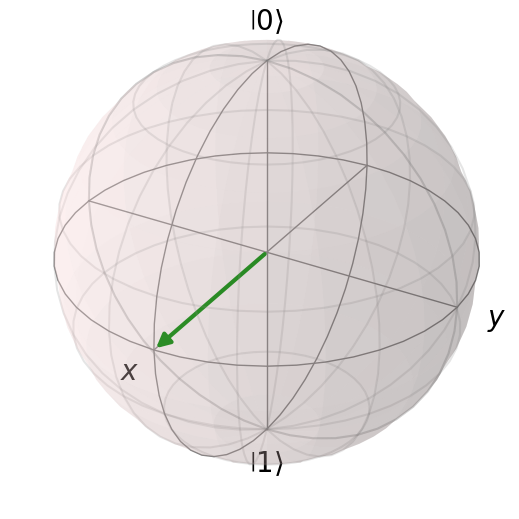

In [4]:

# Listing 11.2: The qubit state |+>
plot_bloch_vector_spherical(pi/2, 0)

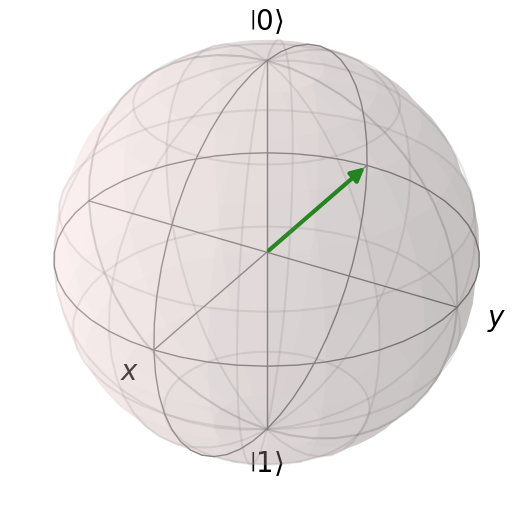

In [5]:
# Listing 11.3: The qubit state |‐>
plot_bloch_vector_spherical(-pi/2, 0)

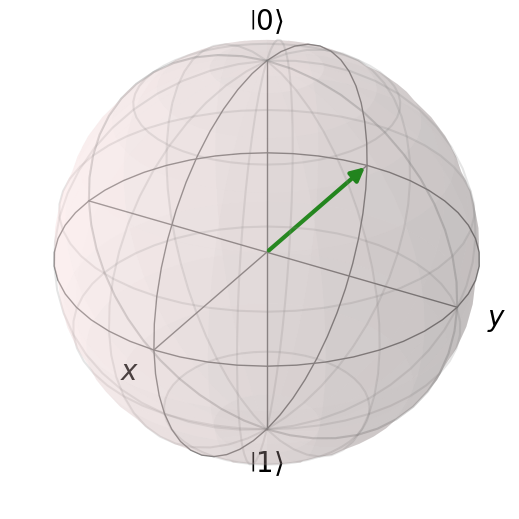

In [6]:
# Listing 11.4: The constructed qubit state |‐>
plot_bloch_vector_spherical(pi/2, pi)

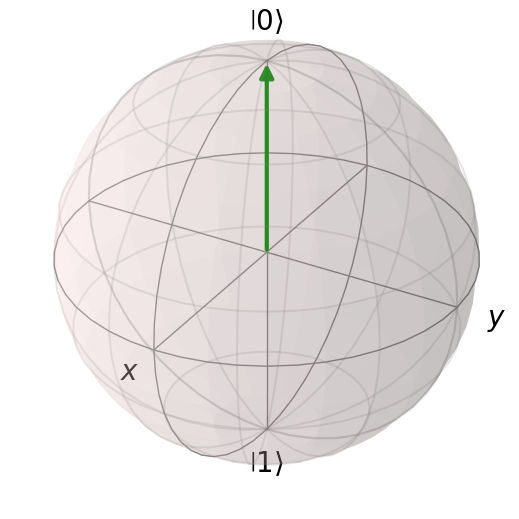

In [7]:
# Listing 11.5: Qubit in state |0>
plot_bloch_vector_spherical(0, pi/2)

Visualize The Invisible Qubit Phase

In [10]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.9 MB/s eta 0:00:00


In [11]:
import qiskit

In [15]:
!pip install qiskit-aer

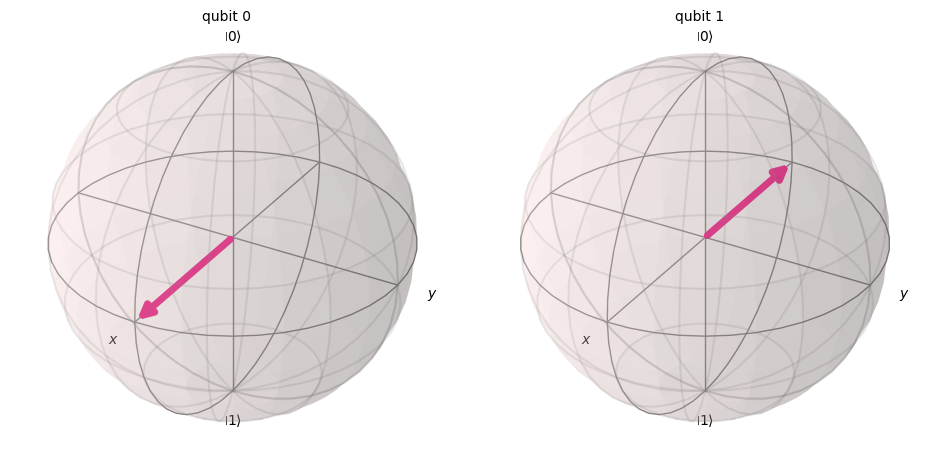

In [18]:
# Listing 11.6: Putting qubit 0 into state |+> and qubit 1 into state |‐>
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)

# put qubit 0 into state |+>
qc.h(0)

# put qubit 1 into state |->
qc.h(1)
qc.z(1)

backend = Aer.get_backend('statevector_simulator')
out = backend.run(qc).result().get_statevector()
plot_bloch_multivector(out)

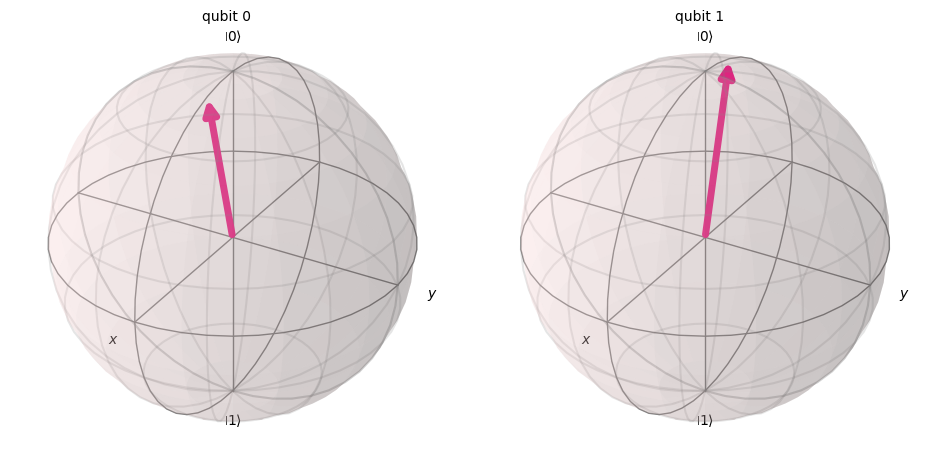

In [21]:
# Listing 11.7: Reflection on the Z-axis
from math import pi
qc = QuantumCircuit(2)
qc.ry(pi/12, 0)
qc.ry(pi/12, 1)
qc.z(1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend()).result().get_statevector()
plot_bloch_multivector(out)

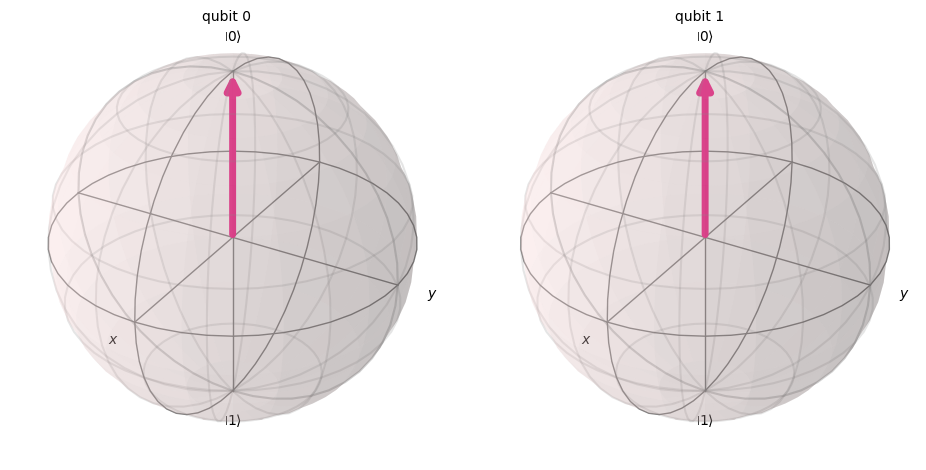

In [23]:
# Listing 11.8: Apply the Z‐gate on a qubit in state |0>
qc = QuantumCircuit(2)

# qubit 0 remains in state |0>
qc.id(0)

# Apply the Z-gate on qubit 1
qc.z(1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

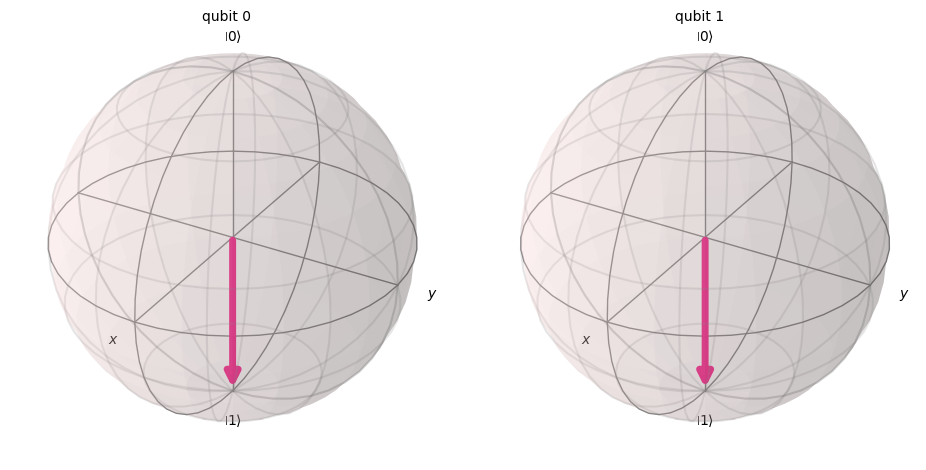

In [24]:
# Listing 11.9: Apply the Z‐gate on a qubit in state |1>
qc = QuantumCircuit(2)

# a qubit in state |1>
qc.x(0)

# The effect of the Z-gate on state |1>
qc.x(1)
qc.z(1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

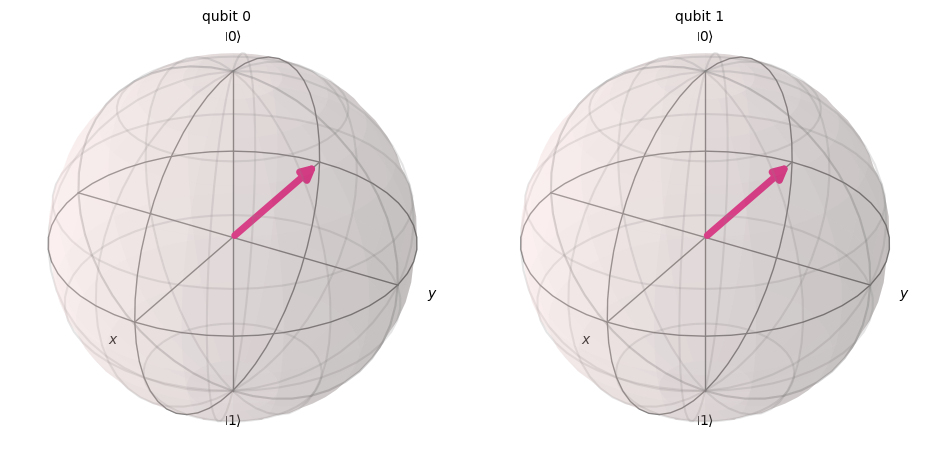

In [26]:
# Listing 11.10: Apply the ZH‐gates on a qubit in state |1>
qc = QuantumCircuit(2)

# Apply H-gate on a qubit in state |1>
qc.x(0)
qc.h(0)

# Apply ZH-gates on a qubit in state |1>
qc.x(1)
qc.z(1)
qc.h(1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

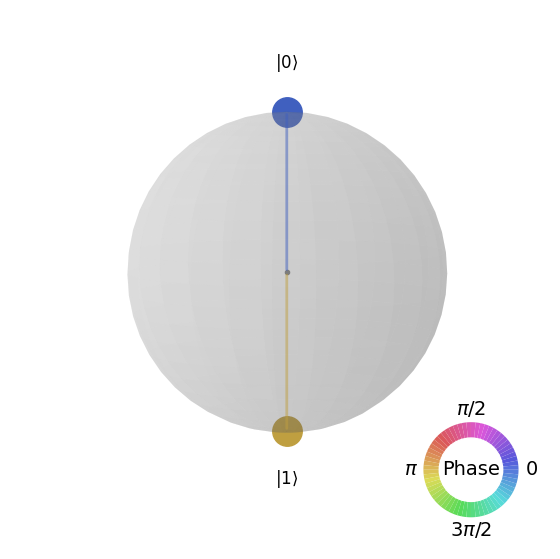

In [27]:
# Listing 11.11: create state (|0>‐|1>)/sqrt(2)
from qiskit.visualization import plot_state_qsphere

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# create state (|0>-|1>)/sqrt(2)
qc.h(0)
qc.z(0)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

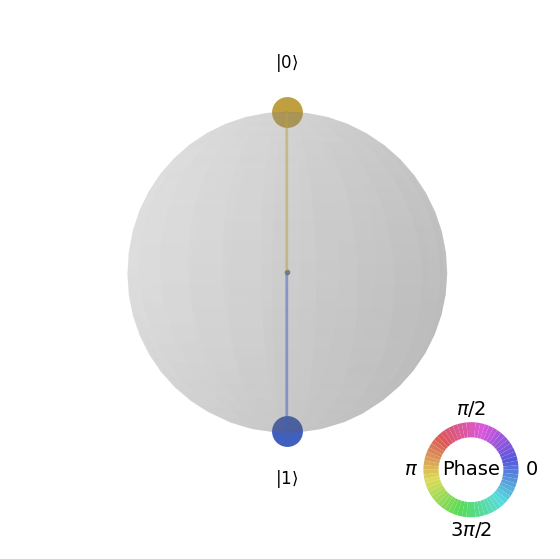

In [28]:
# Listing 11.12: Apply the ZH‐gates on a qubit in state |1>
qc = QuantumCircuit(1)

# Apply ZH-gates on a qubit in state |1>
qc.x(0)
qc.z(0)
qc.h(0)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

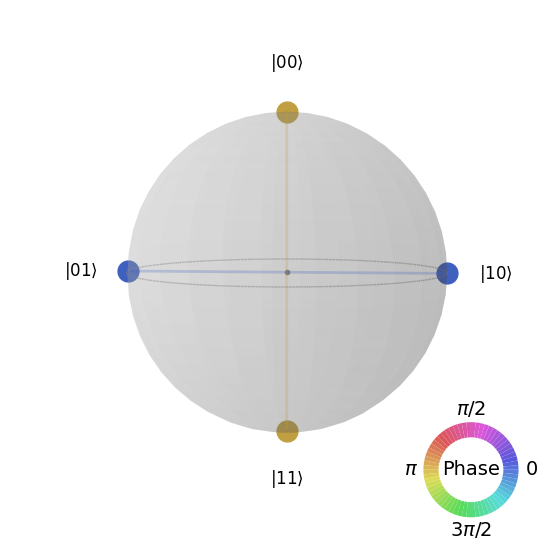

In [29]:
# Listing 11.13: Show the phases of a two‐qubit system
qc = QuantumCircuit(2)

# put qubit 0 into state (|0>-|1>)/sqrt(2)
qc.x(0)
qc.h(0)

# put qubit 1 into state (-|0>+|1>)/sqrt(2)
qc.x(1)
qc.z(1)
qc.h(1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

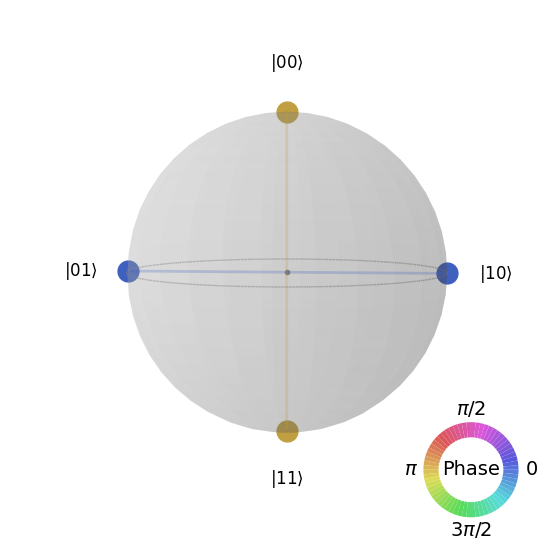

In [30]:
# Listing 11.14: Phases of two qubits in state (|0>‐|1>)/sqrt(2)
qc = QuantumCircuit(2)
# put qubit 0 into state (|0>-|1>)/sqrt(2)
qc.x(0)
qc.h(0)
# put qubit 1 into state (|0>-|1>)/sqrt(2)
qc.x(1)
qc.h(1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

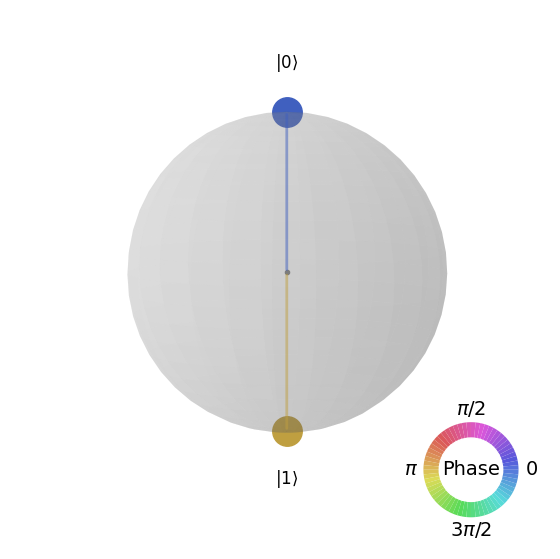

In [31]:
# Listing 11.15: create state (|0>‐|1>)/sqrt(2) in a single‐qubit circuit
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# create state (|0>-|1>)/sqrt(2)
qc.h(0)
qc.z(0)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

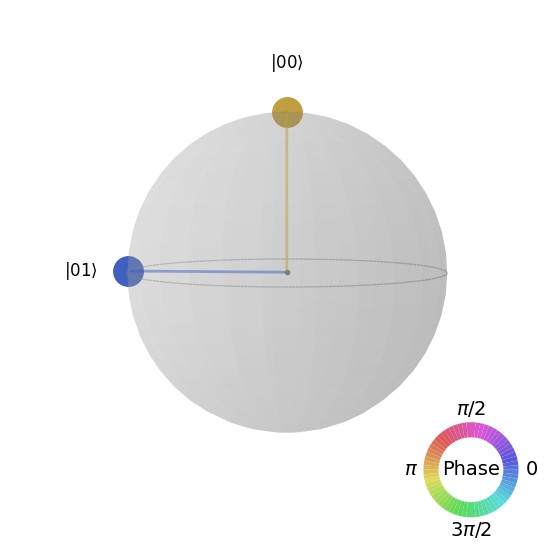

In [32]:
# Listing 11.16: create state (|0>‐|1>)/sqrt(2) in a two‐qubit circuit
# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

# create state (|0>-|1>)/sqrt(2)
qc.h(0)
qc.z(0)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

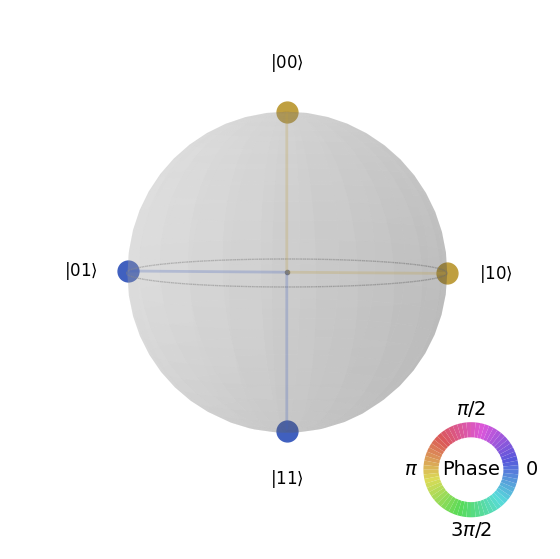

In [33]:
# Listing 11.17: Show the phases of a two‐qubit system
qc = QuantumCircuit(2)

# Apply H-gates on both qubits
qc.h(0)
qc.h(1)

# Shift the phase of qubit 0
qc.z(0)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

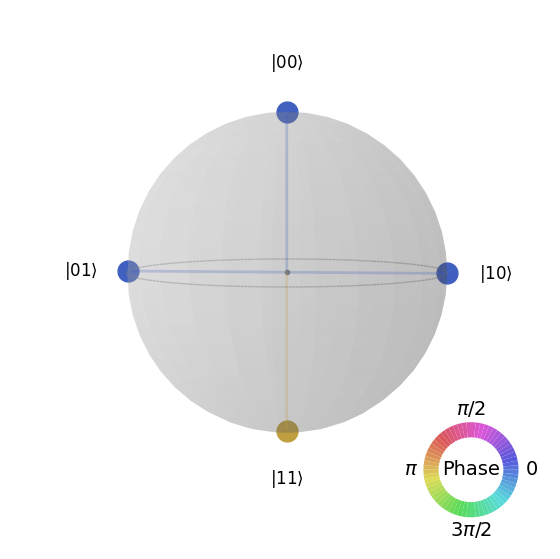

In [34]:
# Listing 11.18: The effect of the CZ‐gate
qc = QuantumCircuit(2)
# Apply H-gates on both qubits
qc.h(0)
qc.h(1)
# Shift the phase of qubit 0
qc.cz(0,1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

Phase Kickback

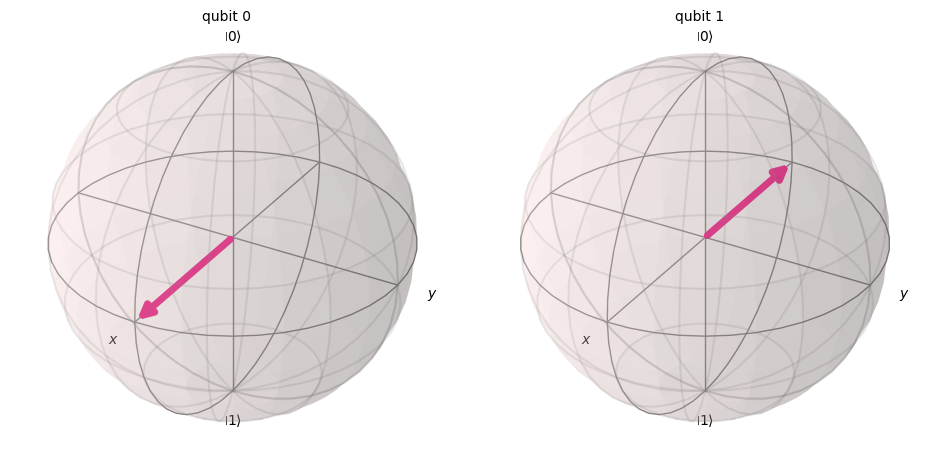

In [35]:
# Listing 11.19: Show state |+‐>
# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

# put qubit 0 into |+>
qc.h(0)

# put qubit 1 into |->
qc.x(1)
qc.h(1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

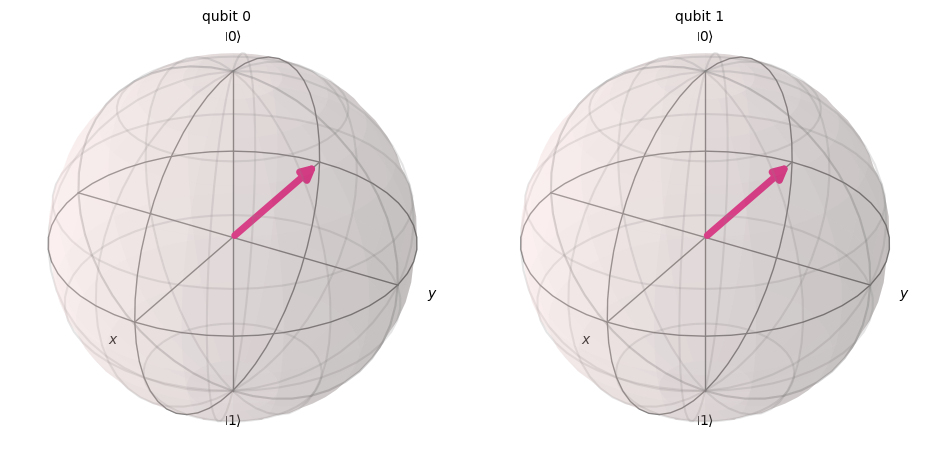

In [36]:
# Listing 11.20: Show effect of CNOT‐gate on state |+‐>
# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

# put qubit 0 into |+>
qc.h(0)

# put qubit 1 into |->
qc.x(1)
qc.h(1)

# apply CNOT gate with qubit 0 as control qubit
qc.cx(0,1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

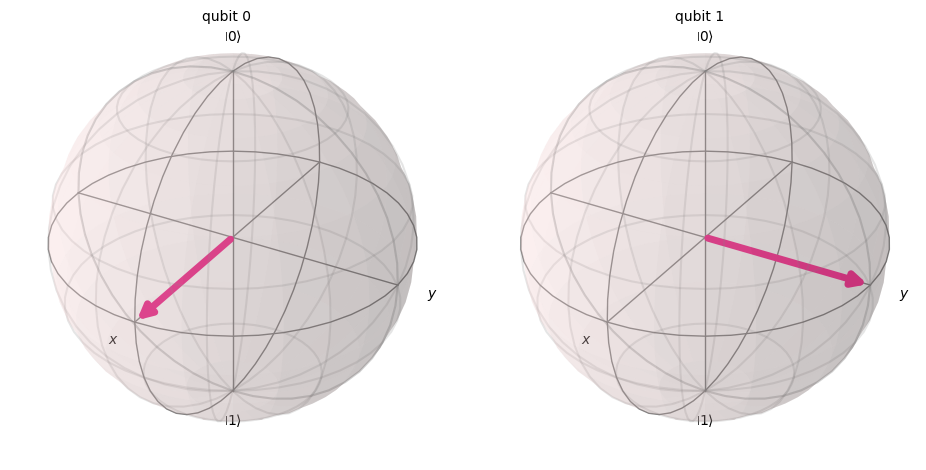

In [37]:
# Listing 11.21: Show effect of RZ-gate on state |+->
# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

# put qubit 0 into |+>
qc.h(0)

# apply phase to qubit 1
qc.h(1)
qc.rz(pi/2,1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

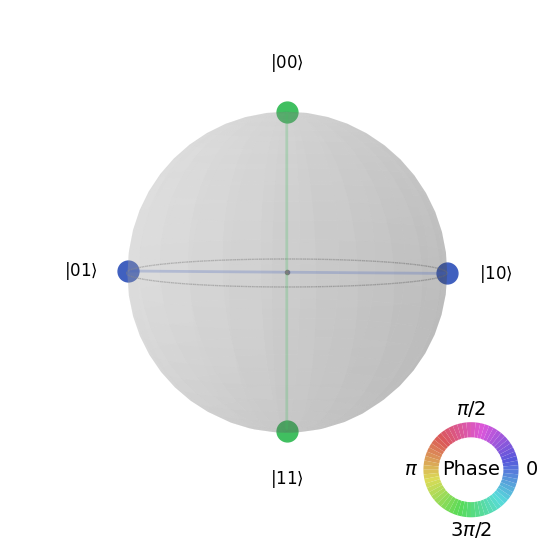

In [38]:
# Listing 11.22: The phase kickback
# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

# put qubit 0 into |+>
qc.h(0)

# apply phase to qubit 1
qc.h(1)
qc.rz(pi/2,1)

# apply CNOT gate with qubit 0 as control qubit
qc.cx(0,1)
out = backend.run(qc).result().get_statevector()
#out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

In [41]:
# Listing 11.23: Negating the amplitude
from qiskit import QuantumCircuit
from qiskit_aer import Aer
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)

# execute the qc
out = backend.run(qc).result().get_statevector()

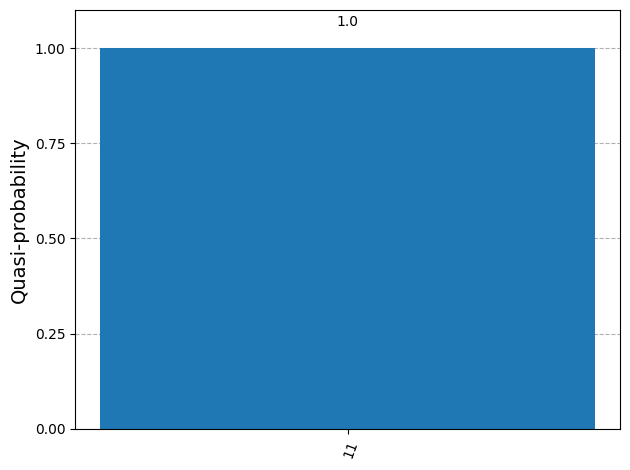

In [43]:
# Listing 11.24: Working with amplitudes
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)
qc.z(0)
qc.z(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)

# execute the qc
results = backend.run(qc).result().get_counts()
plot_histogram(results)

In [14]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.7 MB/s eta 0:00:00
